In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
def load_and_preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reshape image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    return image, pixels

In [3]:
def apply_kmeans(pixels, k):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    # Get the labels and cluster centers (dominant colors)
    labels = kmeans.labels_
    dominant_colors = kmeans.cluster_centers_.astype(int)
    return labels, dominant_colors

In [4]:
def visualize_dominant_colors(dominant_colors):
    # Plot each dominant color as a rectangle
    plt.figure(figsize=(8, 6))
    for i, color in enumerate(dominant_colors):
        plt.subplot(1, len(dominant_colors), i + 1)
        plt.axis('off')
        plt.imshow([[color]])
    plt.show()

In [5]:
def recreate_image_with_dominant_colors(image, labels, dominant_colors):
    # Recreate the image using the dominant colors
    new_image = dominant_colors[labels].reshape(image.shape)
    return new_image

In [12]:
def plot_clustering(image, new_image, dominant_colors):
    # Plot original image and new image side by side
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.axis('off')
    plt.imshow(image)
    
    # Image with Dominant Colors
    plt.subplot(1, 2, 2)
    plt.title('Image with Dominant Colors')
    plt.axis('off')
    plt.imshow(new_image)
    
    plt.show()
    
    # Visualize dominant colors
    visualize_dominant_colors(dominant_colors)

def analyze_pixel_distribution(labels, dominant_colors):
    # Count the number of pixels assigned to each cluster
    unique, counts = np.unique(labels, return_counts=True)
    color_distribution = dict(zip(unique, counts))
    
    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(dominant_colors)), counts, color=[color/255 for color in dominant_colors])
    plt.title('Pixel Distribution of Dominant Colors')
    plt.xlabel('Cluster Index')
    plt.ylabel('Number of Pixels')
    plt.show()


c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


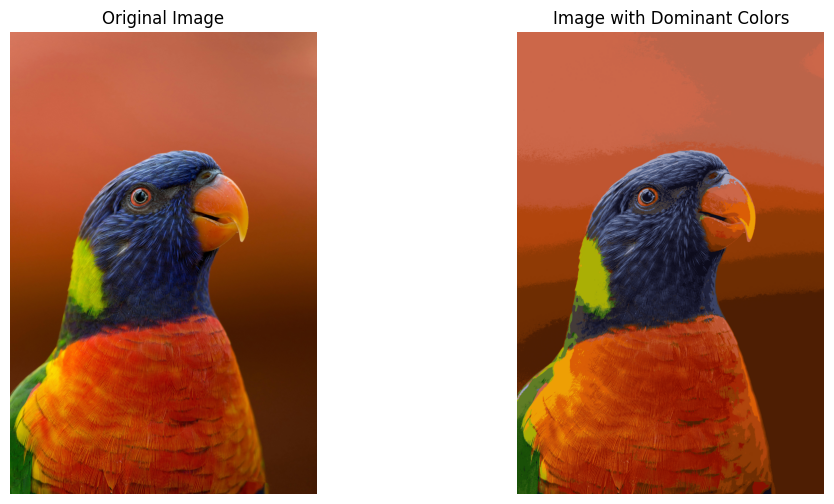

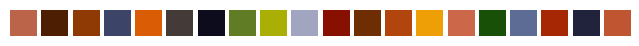

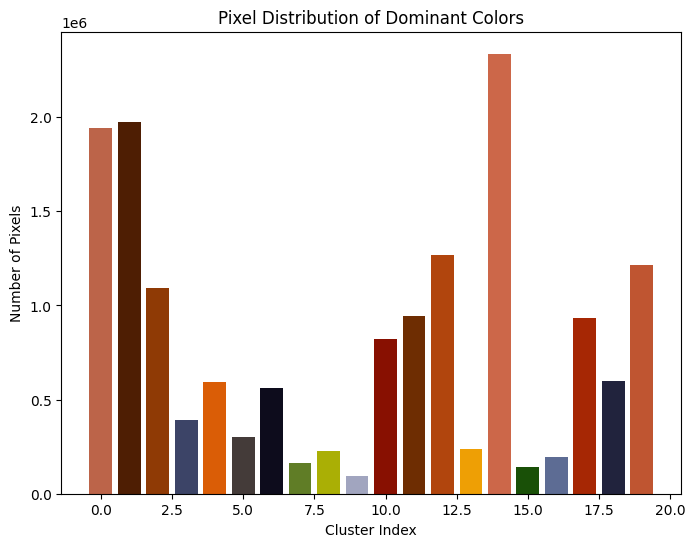

In [15]:
# Path to the image
image_path = 'E:\intern\data\domenentcolour.jpg'
k = 20  # Number of dominant colors

# Step-by-Step Process
image, pixels = load_and_preprocess_image(image_path)
labels, dominant_colors = apply_kmeans(pixels, k)
new_image = recreate_image_with_dominant_colors(image, labels, dominant_colors)
plot_clustering(image, new_image, dominant_colors)
analyze_pixel_distribution(labels, dominant_colors)
